<a href="https://colab.research.google.com/github/Betsabeh/Python_codes-tutorial-/blob/main/example_python_torch_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torchsummary import summary
import torch.optim as optim



In [ ]:
#import data
data = pd.read_csv("iris.data")
print("Data format:")
print(data.head())

#separate features and labels
X = data.iloc[:,:-1]
Y =data.iloc[:,-1]
numeric_Y = Y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#separate Train and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,numeric_Y)
print("------------------------------------")
print("Train size=", np.shape(X_train))
print("Test size=", np.shape(X_test))
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.long)
Y_test = torch.tensor(Y_test.values, dtype=torch.long)


Data format:
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
------------------------------------
Train size= (111, 4)
Test size= (38, 4)


<ipython-input-11-2632e07cd6d9>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_Y = Y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


In [ ]:
#create a model
model = nn.Sequential(
    nn.Linear(in_features= 4,out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16,out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=3),
    nn.Softmax(dim=1)
)
print(summary(model, (4,)))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              80
              ReLU-2                   [-1, 16]               0
            Linear-3                   [-1, 16]             272
              ReLU-4                   [-1, 16]               0
            Linear-5                    [-1, 3]              51
           Softmax-6                    [-1, 3]               0
Total params: 403
Trainable params: 403
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


Epoch 1/50, Loss: 1.0657
Epoch 2/50, Loss: 1.0638
Epoch 3/50, Loss: 1.0620
Epoch 4/50, Loss: 1.0601
Epoch 5/50, Loss: 1.0583
Epoch 6/50, Loss: 1.0564
Epoch 7/50, Loss: 1.0546
Epoch 8/50, Loss: 1.0528
Epoch 9/50, Loss: 1.0510
Epoch 10/50, Loss: 1.0491
Epoch 11/50, Loss: 1.0473
Epoch 12/50, Loss: 1.0455
Epoch 13/50, Loss: 1.0436
Epoch 14/50, Loss: 1.0418
Epoch 15/50, Loss: 1.0399
Epoch 16/50, Loss: 1.0380
Epoch 17/50, Loss: 1.0360
Epoch 18/50, Loss: 1.0341
Epoch 19/50, Loss: 1.0321
Epoch 20/50, Loss: 1.0300
Epoch 21/50, Loss: 1.0280
Epoch 22/50, Loss: 1.0258
Epoch 23/50, Loss: 1.0237
Epoch 24/50, Loss: 1.0215
Epoch 25/50, Loss: 1.0192
Epoch 26/50, Loss: 1.0169
Epoch 27/50, Loss: 1.0146
Epoch 28/50, Loss: 1.0122
Epoch 29/50, Loss: 1.0098
Epoch 30/50, Loss: 1.0073
Epoch 31/50, Loss: 1.0048
Epoch 32/50, Loss: 1.0022
Epoch 33/50, Loss: 0.9996
Epoch 34/50, Loss: 0.9970
Epoch 35/50, Loss: 0.9943
Epoch 36/50, Loss: 0.9916
Epoch 37/50, Loss: 0.9889
Epoch 38/50, Loss: 0.9861
Epoch 39/50, Loss: 0.

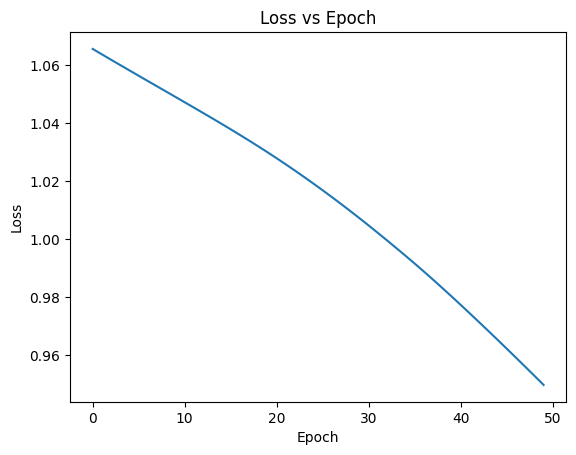

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 50
losser =[]

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    losser.append(loss.item())


plt.plot(losser)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()




In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == Y_test).sum().item() / len(Y_test)

print("Test accuracy=",accuracy)



Test accuracy= 0.8947368421052632
